In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
def loadData():
    x = np.load("data/X.npy")
    y = np.load("data/y.npy")
    return x, y

In [3]:
def plotData(x, y):
    fig, axes = plt.subplots(8, 8, figsize = (5, 5))

    for i, ax in enumerate(axes.flat):
        idx = np.random.randint(len(x))

        ax.imshow(x[idx].reshape((20, 20)).T, cmap = 'gray')
        ax.set_axis_off()
        ax.set_title(y[idx, 0], fontsize = 9)
    plt.tight_layout()

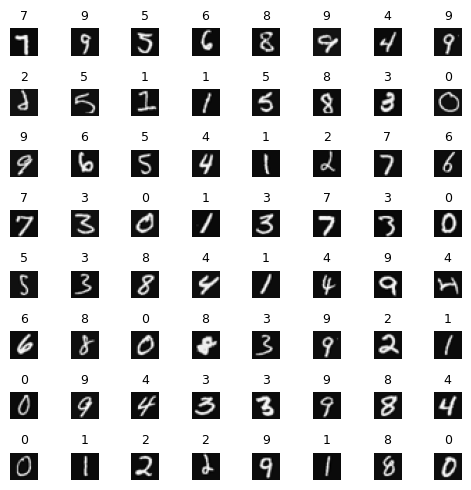

In [4]:
x, y = loadData()
plotData(x, y)

In [5]:
model = Sequential([
    Input((400, )),
    Dense(25, activation = 'relu'),
    Dense(15, activation = 'relu'),
    Dense(10, activation = 'linear'),
])

model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),
             optimizer = Adam(0.001))

model.fit(x, y, epochs = 40)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - loss: 1.8993 
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.7178
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.4689
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.3651
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.3278
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.2900
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.2656
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2483
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.2236
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.2127
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.1668
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.1815
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.1581
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.1480
Epoch 15/40
157/157 ━━━━━━━━━━

In [6]:
def plotPred(x):
    fig, axes = plt.subplots(8, 8, figsize = (5, 5))

    idx = np.random.choice(len(x), 64)
    x = x[idx]
    pred = model.predict(x)
    pred = np.argmax(pred, axis = 1)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i].reshape((20, 20)).T, cmap = 'gray')
        ax.set_axis_off()
        ax.set_title(pred[i], fontsize = 9)
    plt.tight_layout()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


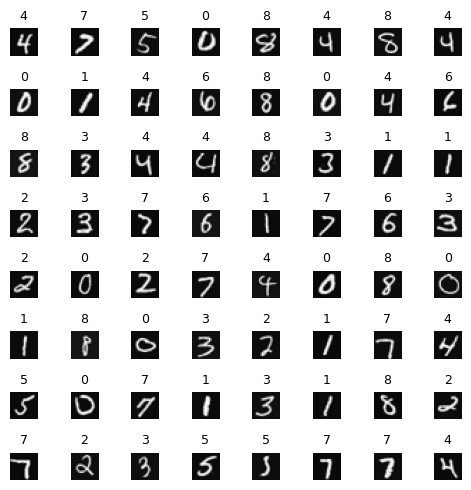

In [7]:
plotPred(x)